<a href="https://colab.research.google.com/github/IshitaGusain/Assignment_1/blob/main/arima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("/dataset_tk.csv")
df

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02-01-2019 00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03-01-2019 00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04-01-2019 00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05-01-2019 00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06-01-2019 00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01-12-2020 00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02-12-2020 00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03-12-2020 00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04-12-2020 00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [ ]:
# STEP 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# STEP 2: Load and prepare the data
df = pd.read_csv('dataset_tk.csv')

df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

# Focus on Punjab
series = df['Punjab']

# STEP 3: Check if the series is stationary
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Series is not stationary. We'll use differencing.")

# STEP 4: Train-Test Split
train = series[:-30]
test = series[-30:]

# STEP 5: Fit the ARIMA model (using (1,1,1) as a basic example)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# STEP 6: Forecast
forecast = model_fit.forecast(steps=30)

# STEP 7: Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print("ARIMA RMSE:", rmse)

# STEP 8: Plot results
plt.figure(figsize=(12, 5))
plt.plot(series, label='Original Series')
plt.plot(forecast.index, forecast, label='Forecast (next 30)', color='red')
plt.title('ARIMA Forecast - Punjab Energy Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 3: Preprocess
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
#df.set_index('date', inplace=True)

# Step 4: Compute total demand
df['total_demand'] = df.drop(columns='date', errors='ignore').sum(axis=1)
series = df['total_demand']

# Step 5: Check for stationarity
result = adfuller(series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series is not stationary. Applying differencing.")

# Step 6: Train-Test Split
train = series[:-30]
test = series[-30:]

# Step 7: Fit ARIMA model (using example order (1,1,1))
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Step 8: Forecast
forecast = model_fit.forecast(steps=30)

# Step 9: Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print("ARIMA RMSE:", rmse)

# Step 10: Plot
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Total Demand')
plt.plot(forecast.index, forecast, label='Forecast (next 30 days)', color='red')
plt.title("ARIMA Forecast - Total Energy Demand (All States)")
plt.xlabel("Date")
plt.ylabel("Total Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('global_power_plant_database.csv')

# Display first few rows
df.head()


<ipython-input-3-64ae5493b959>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
# Select generation columns
gen_cols = [f'generation_gwh_{year}' for year in range(2013, 2018)]

# Sum over all power plants to get total generation per year
yearly_gen = df[gen_cols].sum()

# Convert to DataFrame
ts = pd.DataFrame({
    'year': yearly_gen.index.str.extract('(\d+)').astype(int)[0],
    'generation_gwh': yearly_gen.values
})

# Set year as index
ts.set_index('year', inplace=True)

print(ts)


      generation_gwh
year                
2013    3.803331e+06
2014    4.746498e+06
2015    6.253712e+06
2016    6.338161e+06
2017    6.287425e+06


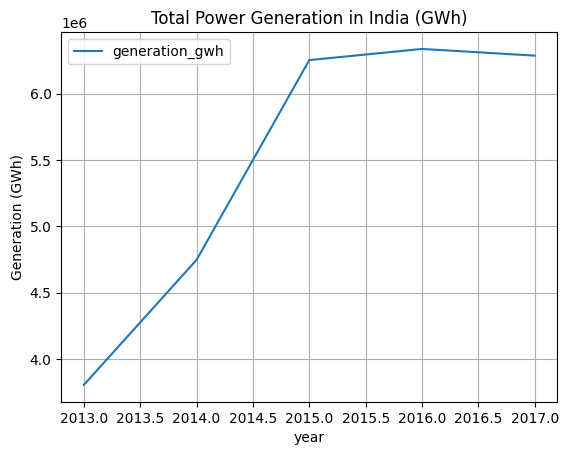

In [ ]:
import matplotlib.pyplot as plt

ts.plot(title="Total Power Generation in India (GWh)")
plt.ylabel("Generation (GWh)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Forecast for next 5 years:
 5    6.385629e+06
6    6.449042e+06
7    6.489988e+06
8    6.516427e+06
9    6.533500e+06
Name: predicted_mean, dtype: float64


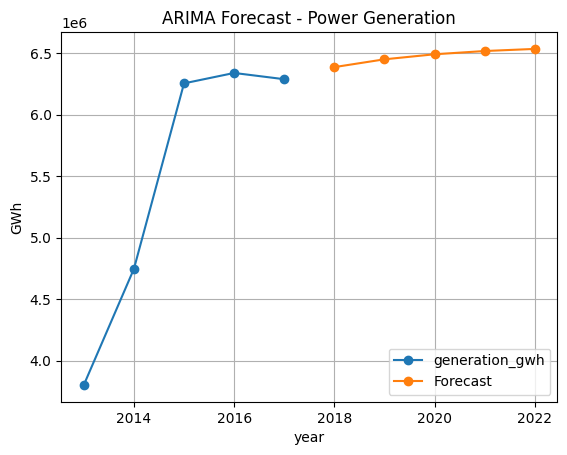

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with order (1,1,1) as example
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)
print("Forecast for next 5 years:\n", forecast)

# Plot
ts.plot(label='Historical', marker='o')
forecast.index = list(range(ts.index[-1] +1, ts.index[-1] + 6))
forecast.plot(label='Forecast', marker='o')
plt.legend()
plt.title("ARIMA Forecast - Power Generation")
plt.ylabel("GWh")
plt.grid(True)
plt.show()


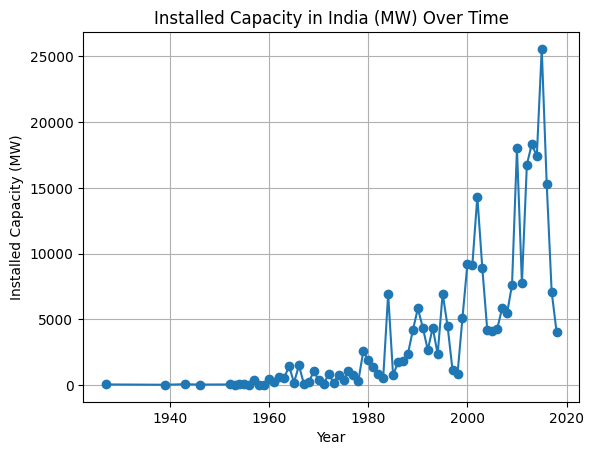

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1333.473, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1342.113, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1339.594, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1339.412, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1340.139, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1336.427, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1337.158, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1339.302, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1341.372, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1336.558, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1335.554, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.765 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


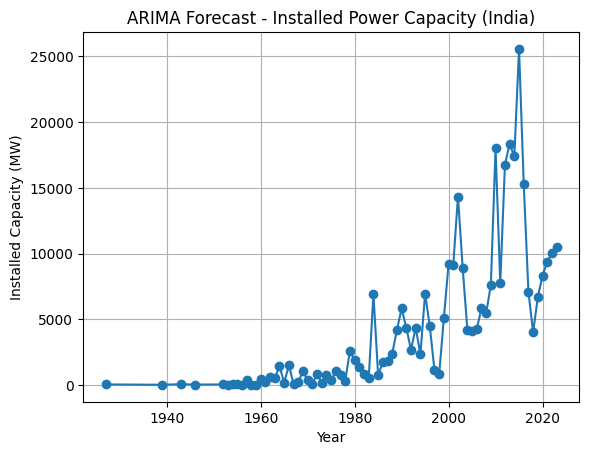

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# STEP 1: Load dataset
#df = pd.read_csv('/mnt/data/global_power_plant_database.csv')

# STEP 2: Filter only Indian data
df_india = df[df['country'] == 'IND']

# STEP 3: Drop rows with missing commissioning year
df_india = df_india.dropna(subset=['commissioning_year'])

# STEP 4: Ensure year is integer
df_india['commissioning_year'] = df_india['commissioning_year'].astype(int)

# STEP 5: Group by year and sum capacity
ts = df_india.groupby('commissioning_year')['capacity_mw'].sum()
ts = ts.sort_index()  # Ensure chronological order

# OPTIONAL: Plot original time series
ts.plot(title="Installed Capacity in India (MW) Over Time", marker='o')
plt.xlabel("Year")
plt.ylabel("Installed Capacity (MW)")
plt.grid(True)
plt.show()

# STEP 6: Fit ARIMA model on the time series
stepwise_model = auto_arima(ts,
                            start_p=1, start_q=1,
                            max_p=3, max_q=3,
                            seasonal=False,
                            trace=True,
                            stepwise=True)

# STEP 7: Forecast for next 5 years
forecast = stepwise_model.predict(n_periods=5)

# STEP 8: Prepare forecast DataFrame
future_years = list(range(ts.index[-1] + 1, ts.index[-1] + 6))
forecast_df = pd.DataFrame({'year': future_years, 'forecast_capacity_mw': forecast})
forecast_df.set_index('year', inplace=True)

# STEP 9: Combine original + forecast for plotting
combined = pd.concat([ts, forecast_df.squeeze()], axis=0)

# STEP 10: Plot forecast
combined.plot(title="ARIMA Forecast - Installed Power Capacity (India)", marker='o', color='tab:blue')
plt.xlabel("Year")
plt.ylabel("Installed Capacity (MW)")
plt.grid(True)
plt.show()


In [ ]:
print(stepwise_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -662.736
Date:                Sat, 05 Apr 2025   AIC                           1333.473
Time:                        11:14:20   BIC                           1342.467
Sample:                             0   HQIC                          1337.045
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     71.9191     36.206      1.986      0.047       0.957     142.881
ar.L1          0.5902      0.115      5.145      0.000       0.365       0.815
ma.L1         -0.9850      0.089    -11.104      0.0